# Model Building

## 1. Importing Necessary Libraries

In [50]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

In [6]:
# loading the processed data
x_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\data\\processed data\\x_train.csv")
x_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\data\\processed data\\x_test.csv")
y_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\data\\processed data\\y_train.csv")
y_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\data\\processed data\\y_test.csv")

In [7]:
# shapes
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15047, 4) (15047, 1) (1672, 4) (1672, 1)


In [8]:
# visualizing the trainings set
x_train.head()

,Platform,Genre,Rating,Age
0,0.080830,-0.904911,-1.120366,0.088126
1,-0.975676,-0.248851,1.525876,0.259447
2,1.982542,0.079179,-1.120366,1.972658
3,-0.553074,0.735239,0.467379,0.773410
4,-1.186978,1.391298,1.525876,-1.625085


In [9]:
# visualizing the test set
x_test.shape

(1672, 4)

In [13]:
# target train 
y_train.head()

,Global_Sales
0,0.03
1,0.44
2,0.08
3,0.08
4,0.41


In [14]:
# target test
y_test.head()

,Global_Sales
0,0.23
1,0.01
2,0.12
3,0.09
4,0.16


## 2. Building BaseLine Model

In [21]:
# base line model means what if the model predicts all the inputs to the mean value of training Global sale price
mean_GS = y_train.mean()
mean_GS = mean_GS[0]
mean_GS

0.533926364059281

In [27]:
y_pred_baseline =  [mean_GS] * len(y_train)
y_pred_baseline

[0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,
 0.533926364059281,


In [51]:
# now let's calculate the mean squared  error and r2 score for the baseline prediction
mse_base = mean_absolute_error(y_train, y_pred_baseline)
r2_base = r2_score(y_train, y_pred_baseline)

print(f"the baseline mean absolute error is :__ {mse_base}")
print(f"the baseline r2_score is:__ {r2_base}")

the baseline mean absolute error is :__ 0.5895136172625743
the baseline r2_score is:__ 0.0


## 3. Model Building

In [33]:
# now let's build the linear regression model
# first let's initialize the linear model
lr_model = LinearRegression()

In [34]:
# let's fit the model to the training target and features
lr_model.fit(x_train,y_train)

LinearRegression()

In [36]:
# let's make prediction of the training set using the model
train_pred = lr_model.predict(x_train)
train_pred

array([[ 0.31183715],
       [ 0.54142369],
       [ 1.01997627],
       ...,
       [ 0.77030561],
       [ 0.76563091],
       [-0.19445672]])

In [37]:
# let's make prediction of the test set using the model
test_pred = lr_model.predict(x_test)
test_pred

array([[ 0.39796295],
       [-0.04438609],
       [ 0.81016066],
       ...,
       [ 0.3353013 ],
       [ 0.50867978],
       [ 0.68667652]])

In [59]:
print(train_pred.shape, test_pred.shape)

(15047, 1) (1672, 1)


In [60]:
train_pred.ndim

2

In [61]:
test_pred.ndim

2

In [62]:
train_pred = train_pred.ravel()


In [63]:
test_pred = test_pred.ravel()

In [64]:
# let's create a data frame of test values and predicted test values
df_dict = {"Test":y_test["Global_Sales"], "Test_Pred":test_pred}
pd.DataFrame(df_dict)

,Test,Test_Pred
0,0.23,0.397963
1,0.01,-0.044386
2,0.12,0.810161
3,0.09,0.436893
4,0.16,0.153182
...,...,...
1667,0.16,0.831874
1668,0.03,0.536555
1669,0.07,0.335301
1670,0.24,0.508680


## 4. Model Evaluation

In [53]:
# now let's evaluate the model
train_mse = mean_absolute_error(y_train, train_pred)
test_mse = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

In [54]:
# let's print the results
print(f"the training mean squared error is:__{train_mse}")
print(f"the test mean squared error is __{test_mse}")
print(f"the training r2_score is __{train_r2}")
print(f"the test r2_score is :{test_r2}")

the training mean squared error is:__0.5634218605380682
the test mean squared error is __0.5677113520717242
the training r2_score is __0.02768818267158102
the test r2_score is :0.02768818267158102


From the above result we can see that we have beaten the baseline model. but the model performance is too low the main reason behind this is:
1. The Dataset is Basically not built for Training or prediction.
2. To follow the proper usage Feature Engineering: we have dropped many columns that are highly correlated to the target feature.
3. In the data cleaning stage we have dropped Leaky features that are again highly correlated to the target feature.

In [76]:
# let's visualize the most predictive features
importances = lr_model.coef_[0]
features = lr_model.feature_names_in_

In [77]:
importances

array([0.20662985, 0.1069313 , 0.13553254, 0.1114116 ])

In [78]:
features

array(['Platform', 'Genre', 'Rating', 'Age'], dtype=object)

In [86]:
# let's build a data frame of features and importances
feat_imp_dict = {"features":features, "importances":importances}
feat_imp_df = pd.DataFrame(feat_imp_dict).set_index("features")
feat_imp_df

,importances
features,
Platform,0.206630
Genre,0.106931
Rating,0.135533
Age,0.111412


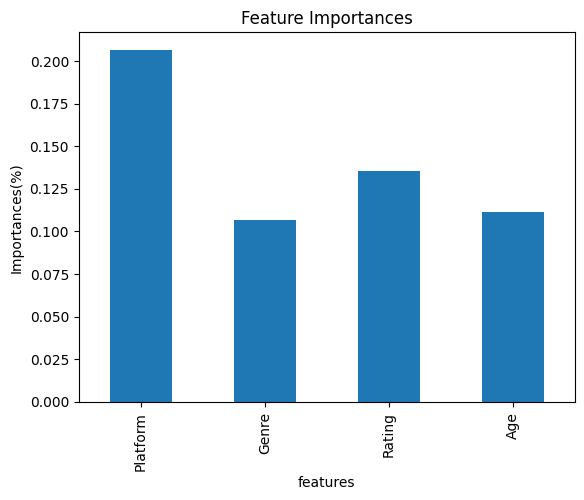

In [89]:
# now let's plot the feature importances plot
feat_imp_df["importances"].plot.bar()
plt.title("Feature Importances")
plt.ylabel("Importances(%)")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\feature_importances.jpg")
plt.show()

As we see from this plot the available features are not enough to Predict the Target Variable.

## 6. Saving The Model

In [91]:
joblib.dump(lr_model, "C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\models\\lr_model.joblib")

['C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\models\\lr_model.joblib']